In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/business-demographics-dataset-london/business-demographics.csv


In [2]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")



In [3]:
#Our data in the structure of a DataFrame
data = pd.read_csv('../input/business-demographics-dataset-london/business-demographics.csv',index_col=0)

In [4]:
#Data info about the 5 first observations
data.head()

,area,year,active_enterprises,births,birth_rate,deaths,death_rate
,,,,,,,
E09000001,City of London,2004,11980,1175,9.8,1160,9.7
E09000002,Barking and Dagenham,2004,3120,480,15.4,410,13.1
E09000003,Barnet,2004,19655,2435,12.4,3015,15.3
E09000004,Bexley,2004,6450,940,14.6,800,12.4
E09000005,Brent,2004,11295,1800,15.9,1745,15.4


In [5]:
#Data overall number of columns and rows
print("Number of rows and columns of dataset are :", data.shape)

Number of rows and columns of dataset are : (969, 7)


In [6]:
#Information about the data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 969 entries, E09000001 to K02000001
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   area                969 non-null    object 
 1   year                969 non-null    int64  
 2   active_enterprises  969 non-null    int64  
 3   births              969 non-null    int64  
 4   birth_rate          969 non-null    float64
 5   deaths              969 non-null    int64  
 6   death_rate          969 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 60.6+ KB


In [7]:
# Checking for missing values among the columns
print(data.isnull().sum())

area                  0
year                  0
active_enterprises    0
births                0
birth_rate            0
deaths                0
death_rate            0
dtype: int64


In [8]:
#Inspection to the catecorical column
data['area'].head()

 
E09000001          City of London
E09000002    Barking and Dagenham
E09000003                  Barnet
E09000004                  Bexley
E09000005                   Brent
Name: area, dtype: object

In [9]:
#Separation of the numerical columns
numer_col = [col for col in data.columns if data[col].dtype!='O']
print(numer_col)
            

['year', 'active_enterprises', 'births', 'birth_rate', 'deaths', 'death_rate']


In [10]:
#Observe the first 5 rows of the numerical columns
data[numer_col].head()

,year,active_enterprises,births,birth_rate,deaths,death_rate
,,,,,,
E09000001,2004,11980,1175,9.8,1160,9.7
E09000002,2004,3120,480,15.4,410,13.1
E09000003,2004,19655,2435,12.4,3015,15.3
E09000004,2004,6450,940,14.6,800,12.4
E09000005,2004,11295,1800,15.9,1745,15.4


In [11]:
#Sum the categories of the categorical column
print(data['area'].nunique())
      

51


In [12]:
#Calculate the proportion of each category 
frequency= data['area'].value_counts(normalize=True)
print(frequency)

area
City of London              0.019608
East Midlands               0.019608
Sutton                      0.019608
Tower Hamlets               0.019608
Waltham Forest              0.019608
Wandsworth                  0.019608
Westminster                 0.019608
Inner London                0.019608
Outer London                0.019608
North East                  0.019608
North West                  0.019608
Yorkshire And The Humber    0.019608
West Midlands               0.019608
Richmond upon Thames        0.019608
East                        0.019608
London                      0.019608
South East                  0.019608
South West                  0.019608
England                     0.019608
Wales                       0.019608
Scotland                    0.019608
Northern Ireland            0.019608
England And Wales           0.019608
Great Britain               0.019608
Southwark                   0.019608
Redbridge                   0.019608
Barking and Dagenham        0.019

In [13]:
#New column based on the transformation of the categorical column to numerical
data['area_encoded'] = data['area'].map(frequency)
print(data[['area','area_encoded']])


                           area  area_encoded
                                             
E09000001        City of London      0.019608
E09000002  Barking and Dagenham      0.019608
E09000003                Barnet      0.019608
E09000004                Bexley      0.019608
E09000005                 Brent      0.019608
...                         ...           ...
S92000003              Scotland      0.019608
N92000002      Northern Ireland      0.019608
K04000001     England And Wales      0.019608
K03000001         Great Britain      0.019608
K02000001        United Kingdom      0.019608

[969 rows x 2 columns]


In [14]:
#Drop of the categorical column from the numerical Dataframe
data_new= data.drop(["area"],axis=1)
print(data_new)


           year  active_enterprises  births  birth_rate  deaths  death_rate  \
                                                                              
E09000001  2004               11980    1175         9.8    1160         9.7   
E09000002  2004                3120     480        15.4     410        13.1   
E09000003  2004               19655    2435        12.4    3015        15.3   
E09000004  2004                6450     940        14.6     800        12.4   
E09000005  2004               11295    1800        15.9    1745        15.4   
...         ...                 ...     ...         ...     ...         ...   
S92000003  2022              174340   18870        10.8   19640        11.3   
N92000002  2022               64745    5385         8.3    5290         8.2   
K04000001  2022             2685600  312670        11.6  320560        11.9   
K03000001  2022             2859940  331540        11.6  340200        11.9   
K02000001  2022             2924685  336925        1

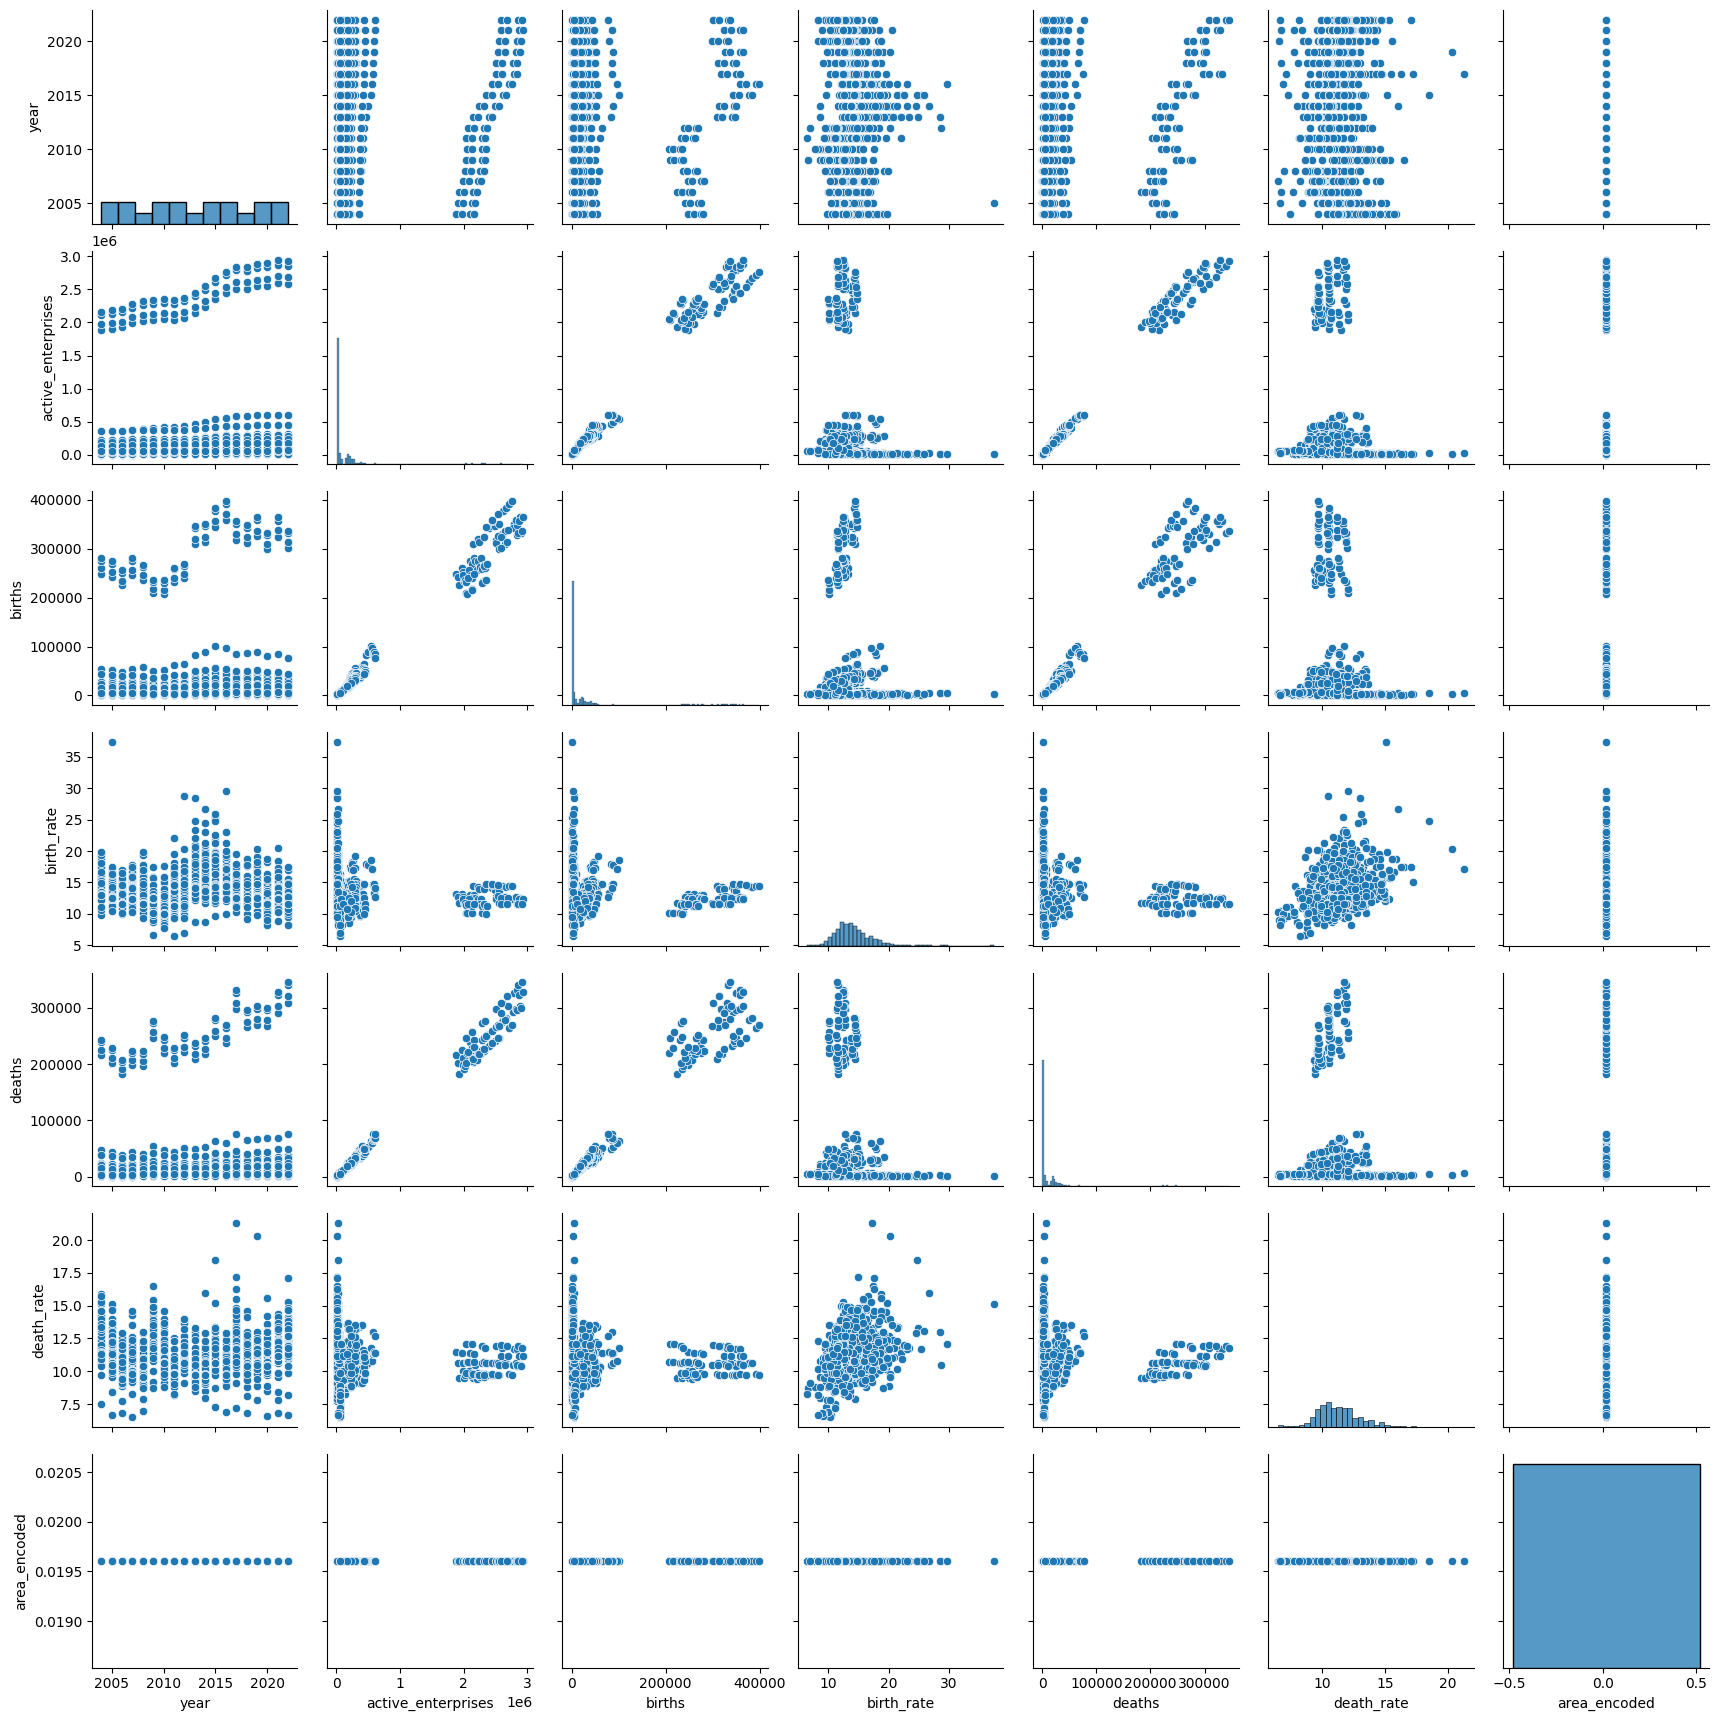

In [15]:
#Visualize the relationship between the variables for correlation inspection

sns.pairplot(data_new)
plt.show()

In [16]:
#Detect Multicollinearity

vif= pd.DataFrame()

vif['feature']= data_new.columns
vif['VIF']= [variance_inflation_factor(data_new.values,i) for i in range(data_new.shape[1])]

print(vif)


              feature            VIF
0                year       1.024191
1  active_enterprises     344.854186
2              births      93.309323
3          birth_rate       1.249208
4              deaths     181.122964
5          death_rate       1.233598
6        area_encoded  138209.274575


In [17]:
#Observe which predictor pair has strong relationship between them

correlation_matrix = data_new.corr()
print(correlation_matrix)


                        year  active_enterprises    births  birth_rate  \
year                1.000000            0.045805  0.052392    0.026927   
active_enterprises  0.045805            1.000000  0.993743   -0.204136   
births              0.052392            0.993743  1.000000   -0.175413   
birth_rate          0.026927           -0.204136 -0.175413    1.000000   
deaths              0.054400            0.996747  0.988129   -0.202811   
death_rate          0.057552           -0.155625 -0.154348    0.340655   
area_encoded             NaN                 NaN       NaN         NaN   

                      deaths  death_rate  area_encoded  
year                0.054400    0.057552           NaN  
active_enterprises  0.996747   -0.155625           NaN  
births              0.988129   -0.154348           NaN  
birth_rate         -0.202811    0.340655           NaN  
deaths              1.000000   -0.134392           NaN  
death_rate         -0.134392    1.000000           NaN  
area_enc

In [18]:
#Define a threshold which implies problematic correlation values above that
threshold= 0.8

problematic_pairs = correlation_matrix[(correlation_matrix.abs()> threshold) & (correlation_matrix.abs()<1)]
print(problematic_pairs)

                    year  active_enterprises    births  birth_rate    deaths  \
year                 NaN                 NaN       NaN         NaN       NaN   
active_enterprises   NaN                 NaN  0.993743         NaN  0.996747   
births               NaN            0.993743       NaN         NaN  0.988129   
birth_rate           NaN                 NaN       NaN         NaN       NaN   
deaths               NaN            0.996747  0.988129         NaN       NaN   
death_rate           NaN                 NaN       NaN         NaN       NaN   
area_encoded         NaN                 NaN       NaN         NaN       NaN   

                    death_rate  area_encoded  
year                       NaN           NaN  
active_enterprises         NaN           NaN  
births                     NaN           NaN  
birth_rate                 NaN           NaN  
deaths                     NaN           NaN  
death_rate                 NaN           NaN  
area_encoded               NaN

In [19]:
#Decide which predictors should be removed

data_new= data_new.drop(columns=['births'])

print(data_new)

           year  active_enterprises  birth_rate  deaths  death_rate  \
                                                                      
E09000001  2004               11980         9.8    1160         9.7   
E09000002  2004                3120        15.4     410        13.1   
E09000003  2004               19655        12.4    3015        15.3   
E09000004  2004                6450        14.6     800        12.4   
E09000005  2004               11295        15.9    1745        15.4   
...         ...                 ...         ...     ...         ...   
S92000003  2022              174340        10.8   19640        11.3   
N92000002  2022               64745         8.3    5290         8.2   
K04000001  2022             2685600        11.6  320560        11.9   
K03000001  2022             2859940        11.6  340200        11.9   
K02000001  2022             2924685        11.5  345490        11.8   

           area_encoded  
                         
E09000001      0.019608 

In [20]:
#Separate our target variable from the idependent predictors

X= data_new[['year','active_enterprises','deaths','death_rate','area_encoded']]
y= data_new.birth_rate

In [21]:
#Fit our Regression model

model= sm.OLS(y,X)
results= model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             birth_rate   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     41.11
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           7.59e-32
Time:                        16:04:22   Log-Likelihood:                -2372.1
No. Observations:                 969   AIC:                             4754.
Df Residuals:                     964   BIC:                             4779.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
year                   0.0129      0.017      0.778      0.437      -0.020       0.045
active_enterprises  4.013e-06   1.83e-06      2.197      0.028    4.29e-07     7.6e-06
deaths              -4.47e-05   1.71e-05     -2.610      0.009   -7.83e-05   -1.11e-05
death_rate             0.6038      0.056     10.767      0.000       0.494       0.714
area_encoded        -943.7804   1701.486     -0.555      0.579   -4282.825    2395.264
==============================================================================
Omnibus:                      311.808   Durbin-Watson:                   0.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1486.548
Skew:                           1.416   Prob(JB):                         0.00
Kurtosis:                       8.366   Cond. No.                     1.31e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
#Trial model to explore the fitness based on new drops
x2= X.copy()

x2= x2.drop(columns=['deaths','active_enterprises','area_encoded'],axis=1)

model2= sm.OLS(y,x2)

results= model2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             birth_rate   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                          1.191e+04
Date:                Thu, 28 Nov 2024   Prob (F-statistic):                        0.00
Time:                        16:04:22   Log-Likelihood:                         -2388.6
No. Observations:                 969   AIC:                                      4781.
Df Residuals:                     967   BIC:                                      4791.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year           0.0036      0.000     11.616      0.000       0.003       0.004
death_rate     0.6109      0.054     11.245      0.000       0.504       0.718
==============================================================================
Omnibus:                      314.361   Durbin-Watson:                   0.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1416.904
Skew:                           1.450   Prob(JB):                    2.10e-308
Kurtosis:                       8.166   Cond. No.                     1.19e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
#Back to our data X and the model refit`
X= X.drop(columns= ['deaths','active_enterprises','area_encoded'], axis=1)
model= sm.OLS(y,X)

results= model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             birth_rate   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                          1.191e+04
Date:                Thu, 28 Nov 2024   Prob (F-statistic):                        0.00
Time:                        16:04:22   Log-Likelihood:                         -2388.6
No. Observations:                 969   AIC:                                      4781.
Df Residuals:                     967   BIC:                                      4791.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year           0.0036      0.000     11.616      0.000       0.003       0.004
death_rate     0.6109      0.054     11.245      0.000       0.504       0.718
==============================================================================
Omnibus:                      314.361   Durbin-Watson:                   0.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1416.904
Skew:                           1.450   Prob(JB):                    2.10e-308
Kurtosis:                       8.166   Cond. No.                     1.19e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
#Predictive y values of the linear model

y_predicted= results.predict(X)
print(y_predicted)

 
E09000001    13.093176
E09000002    15.170366
E09000003    16.514430
E09000004    14.742710
E09000005    16.575524
               ...    
S92000003    14.135052
N92000002    12.241144
K04000001    14.501615
K03000001    14.501615
K02000001    14.440522
Length: 969, dtype: float64


In [25]:
#Display the estimated coefficients

coefficients= results.params

print("Number of coefficients",len(coefficients))

print("Estimated coefficients",coefficients)

Number of coefficients 2
Estimated coefficients year          0.003576
death_rate    0.610938
dtype: float64


In [26]:
#Calculate leverage points and standardized residuals

influence= results.get_influence()
standardized_residuals= influence.resid_studentized_internal
leverage= influence.hat_matrix_diag
cooks_d= influence.cooks_distance[0]

In [27]:
#Setting the boundaries values 
leverage_threshold= 2 * (X.shape[1])/ X.shape[0]
residuals_threshold= 2

In [28]:
#Calculations of outliers and predictor points which are far from the mean value

high_leverage_points= np.where(leverage> leverage_threshold)[0]
outliers= np.where(np.abs(standardized_residuals)> residuals_threshold)[0]


In [29]:
print("\nHigh leverage points:", high_leverage_points)
print("Outliers are:\n", outliers)



High leverage points: [  2   4  12  13  21  23  24  25  29  30  47  75  81  98 102 149 155 178
 199 200 204 251 256 257 259 264 265 267 276 277 279 280 282 284 285 286
 330 376 404 531 557 579 582 608 659 663 664 673 684 685 687 690 693 694
 710 714 715 746 761 789 812 840 863 867 877 899 914 918 919 928 940 942
 943 948 965]
Outliers are:
 [ 75 302 358 381 404 429 455 460 467 469 470 477 480 481 483 488 489 490
 511 521 528 531 534 539 540 561 562 571 572 579 585 586 590 591 613 622
 623 636 816]


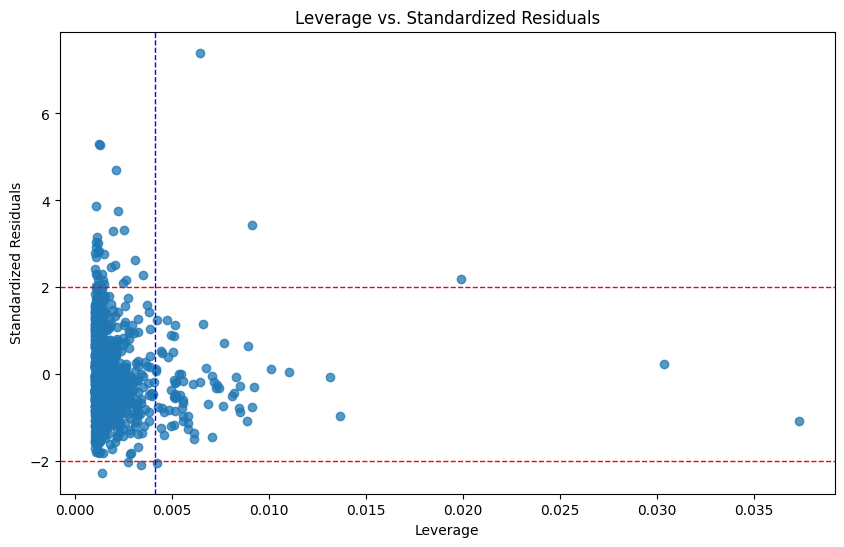

In [30]:
#Leverage vs Standardized Residual plot 

plt.figure(figsize=(10, 6))
plt.scatter(leverage, standardized_residuals, alpha=0.75)
plt.axhline(y=2, color='red', linestyle='--', linewidth=1)
plt.axhline(y=-2, color='red', linestyle='--', linewidth=1)
plt.axvline(x=leverage_threshold, color='blue', linestyle='--', linewidth=1)
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.title('Leverage vs. Standardized Residuals')
plt.show()

In [31]:
X_reset = X.reset_index(drop=True)  # Resetting index and discarding the old one
y_reset = pd.Series(y).reset_index(drop=True)

removed_outliers= list(set(range(len(y))) - set(outliers))

# Now filter X and y using the indices of non-outliers
X_filtered_outliers = X_reset.iloc[removed_outliers]
y_filtered_outliers = y_reset.iloc[removed_outliers]

# Refit the model without outliers
model_filtered = sm.OLS(y_filtered_outliers, X_filtered_outliers)
results_filtered = model_filtered.fit()

print("\nModel summary after removing outliers:\n")
print(results_filtered.summary())




Model summary after removing outliers:

                                 OLS Regression Results                                
Dep. Variable:             birth_rate   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                          1.749e+04
Date:                Thu, 28 Nov 2024   Prob (F-statistic):                        0.00
Time:                        16:04:23   Log-Likelihood:                         -2073.8
No. Observations:                 930   AIC:                                      4152.
Df Residuals:                     928   BIC:                                      4161.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
